In [2]:
%matplotlib inline
import numpy as np

In [1]:
import pandas as pd

ImportError: C extension: No module named dateutil.tz not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext --inplace' to build the C extensions first.

In [4]:
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('ex2data1.txt', delimiter=',')

In [6]:
df.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
I = np.ones(df['X1'].size)
X = pd.DataFrame([I, df['X1'], df['X2']]).transpose()
y = df['Y']
print X

    0          1          2
0   1  34.623660  78.024693
1   1  30.286711  43.894998
2   1  35.847409  72.902198
3   1  60.182599  86.308552
4   1  79.032736  75.344376
5   1  45.083277  56.316372
6   1  61.106665  96.511426
7   1  75.024746  46.554014
8   1  76.098787  87.420570
9   1  84.432820  43.533393
10  1  95.861555  38.225278
11  1  75.013658  30.603263
12  1  82.307053  76.481963
13  1  69.364589  97.718692
14  1  39.538339  76.036811
15  1  53.971052  89.207350
16  1  69.070144  52.740470
17  1  67.946855  46.678574
18  1  70.661510  92.927138
19  1  76.978784  47.575964
20  1  67.372028  42.838438
21  1  89.676776  65.799366
22  1  50.534788  48.855812
23  1  34.212061  44.209529
24  1  77.924091  68.972360
25  1  62.271014  69.954458
26  1  80.190181  44.821629
27  1  93.114389  38.800670
28  1  61.830206  50.256108
29  1  38.785804  64.995681
.. ..        ...        ...
70  1  32.722833  43.307173
71  1  64.039320  78.031688
72  1  72.346494  96.227593
73  1  60.457886  73

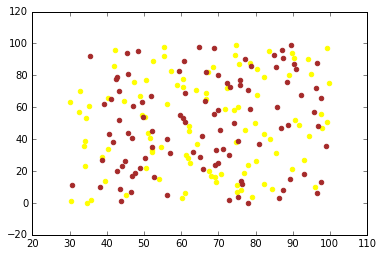

In [8]:
plt.scatter(df['X1'], range(df['X1'].size),color='yellow')
plt.scatter(df['X2'], range(df['X2'].size),color='brown')
plt.xticks()
plt.yticks()
plt.show()

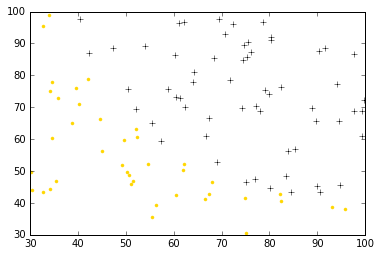

In [9]:
def plotGraph(df):
    pos1, neg1 = [], []
    pos2, neg2 = [], []
    for x1,x2 in df.iterrows():
        if x2.Y == 1.0:
            pos1.append(x2.X1)
            pos2.append(x2.X2)
        else:
            neg1.append(x2.X1)
            neg2.append(x2.X2)
    pos1 = pd.DataFrame(pos1)
    pos2 = pd.DataFrame(pos2)
    neg1 = pd.DataFrame(neg1)
    neg2 = pd.DataFrame(neg2)
    plt.plot( pos1, pos2,'+', color='black',marker='+', linewidth=2)
    #plt.plot(range(pos2.size),pos2,  '.',color='red')
    plt.plot( neg1,neg2, '.', color='gold')
    #plt.plot( range(neg2.size), neg2,'x',color='black')
    
plotGraph(df)

In [10]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [11]:
sigmoid(0)

0.5

In [12]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    return(J)

In [13]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)
    return(grad.flatten())

In [14]:
from sklearn import linear_model

In [22]:
clf = linear_model.LogisticRegression()
clf.fit(X,y)
#print clf.intercept_
#print clf.coef_
from sklearn.metrics import accuracy_score
print accuracy_score(clf.predict(X), y)
print clf.predict(np.array([1,75,30]))


0.91
[0]


C:\Users\Revanth\Anaconda\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Regularization

In [24]:
data = pd.read_csv('ex2data2.txt', delimiter=',',names=['X1','X2','Y'])

In [25]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [26]:
data2 = loaddata('ex2data2.txt', ',')

('Dimensions: ', (118L, 3L))
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [27]:
data.head()

,X1,X2,Y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [28]:
print data2.shape 
#print data.ix[:,2].head()

(118L, 3L)


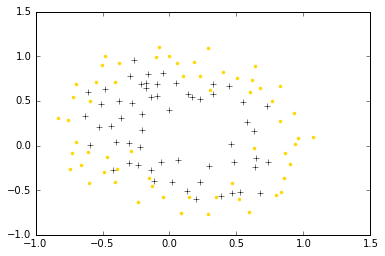

In [30]:
plotGraph(data)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(6)
X = data2[:,0:2]
XX = poly.fit_transform(X)
print XX.shape
y = np.c_[data2[:,2]]
print y.shape
print XX


(118L, 28L)
(118L, 1L)
[[  1.00000000e+00   5.12670000e-02   6.99560000e-01 ...,   6.29470940e-04
    8.58939846e-03   1.17205992e-01]
 [  1.00000000e+00  -9.27420000e-02   6.84940000e-01 ...,   1.89305413e-03
   -1.39810280e-02   1.03255971e-01]
 [  1.00000000e+00  -2.13710000e-01   6.92250000e-01 ...,   1.04882142e-02
   -3.39734512e-02   1.10046893e-01]
 ..., 
 [  1.00000000e+00  -4.84450000e-01   9.99270000e-01 ...,   2.34007252e-01
   -4.82684337e-01   9.95627986e-01]
 [  1.00000000e+00  -6.33640000e-03   9.99270000e-01 ...,   4.00328554e-05
   -6.31330588e-03   9.95627986e-01]
 [  1.00000000e+00   6.32650000e-01  -3.06120000e-02 ...,   3.51474517e-07
   -1.70067777e-08   8.22905998e-10]]


In [33]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    J = -1*(1./m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])
    

In [34]:

def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1./m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())  

In [35]:
initial_theta = np.zeros(XX.shape[1])
print initial_theta
costFunctionReg(initial_theta, 1, XX, y)
print gradientReg(initial_theta, 1, XX, y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]


In [36]:
from sklearn import linear_model

In [37]:
logi = linear_model.LogisticRegression()
logi.fit(XX,y.ravel())
p =logi.predict(XX)
from sklearn.metrics import accuracy_score
print accuracy_score(p,y)
from scipy.optimize import fmin_bfgs

0.830508474576
